In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [117]:
steel = pd.read_csv(r"best_steel_model.csv")
exact = pd.read_csv(r"exact_method-raw_steel_predictions.csv")

In [118]:
steel = steel.rename(columns={"epsilon": "steel_epsilon"})
exact = exact.rename(columns={"epsilon": "exact_epsilon"})

In [119]:
both = steel.merge(exact, how="inner", on="filename")
both["abs_diff"] = abs(both["steel_epsilon"] - both["exact_epsilon"])
both["cmae"] = np.min(
    np.array([list(both["abs_diff"]), list(1 - both["abs_diff"])]), axis=0
)
both["cmae"]

0        0.083310
1        0.098966
2        0.127872
3        0.211851
4        0.068577
           ...   
99995    0.074167
99996    0.192480
99997    0.411643
99998    0.218188
99999    0.168026
Name: cmae, Length: 100000, dtype: float64

In [120]:
cmae = np.array(both.cmae)
cmae.mean()

np.float64(0.22981485342091298)

In [121]:
both_04_05 = both[(both["steel_epsilon"] < 0.5) & (both["steel_epsilon"] > 0.4)]

Text(0, 0.5, 'Amount')

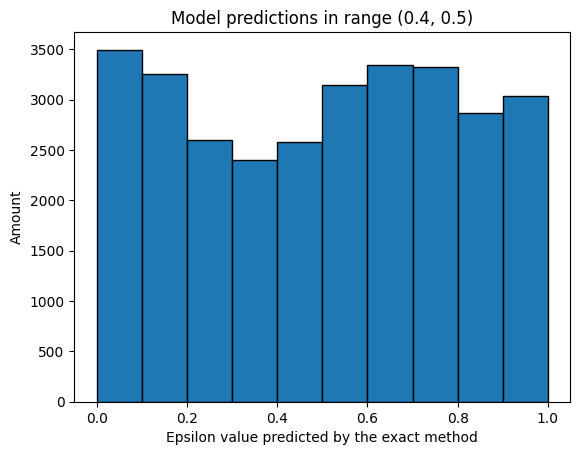

In [122]:
plt.hist(both_04_05["exact_epsilon"], bins=10, edgecolor="black")
plt.title("Model predictions in range (0.4, 0.5)")
plt.xlabel("Epsilon value predicted by the exact method")
plt.ylabel("Amount")

Text(0, 0.5, 'Cyclic Absolute Error - steel model')

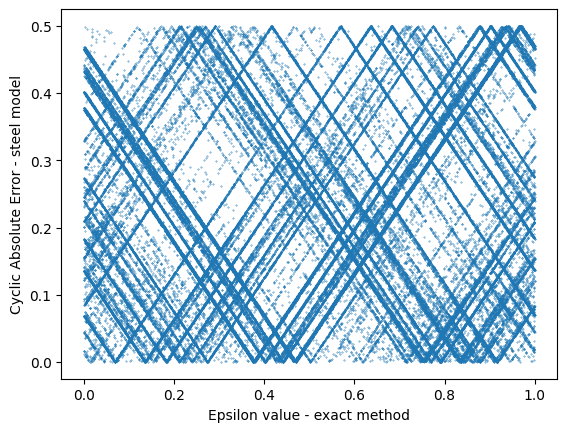

In [123]:
plt.scatter(both["exact_epsilon"], both["cmae"], s=0.1)
plt.xlabel("Epsilon value - exact method")
plt.ylabel("Cyclic Absolute Error - steel model")

Text(0, 0.5, 'Difference to model prediction')

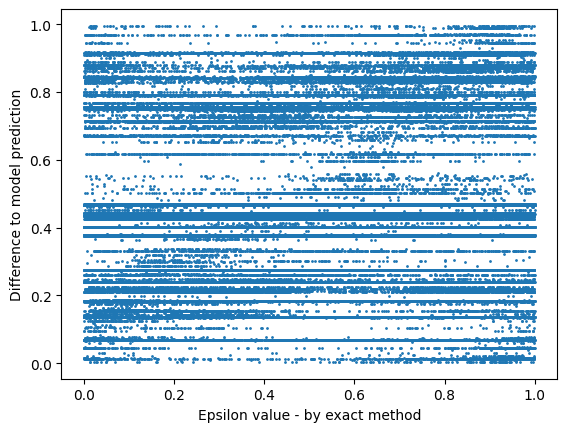

In [124]:
plt.scatter(both["exact_epsilon"], both["steel_epsilon"], s=1)
plt.xlabel("Epsilon value - by exact method")
plt.ylabel("Difference to model prediction")

## Oczekiwania

In [125]:
both["filenr"] = both["filename"].apply(lambda x: int(x.split(".")[0]))
regular_sample = both[(both["filenr"] > 0) & (both["filenr"] < 200)]

Text(0.5, 23.52222222222222, 'Image index')

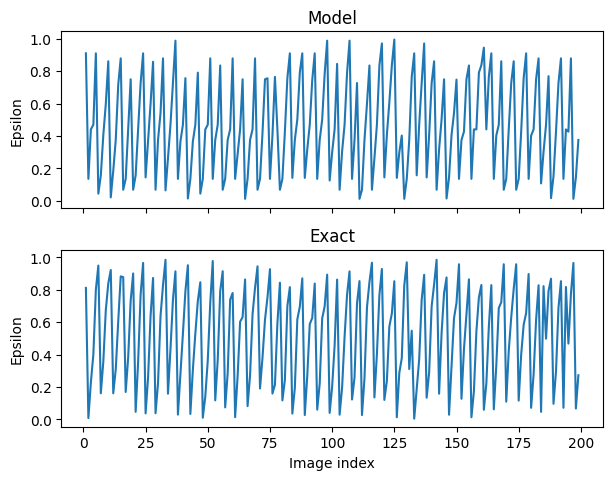

In [126]:
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
fig.tight_layout(pad=2.0)
axs[0].plot(regular_sample["filenr"], regular_sample["steel_epsilon"])
axs[0].set_title("Model")
axs[0].set_ylabel("Epsilon")
axs[1].plot(regular_sample["filenr"], regular_sample["exact_epsilon"])
axs[1].set_title("Exact")
axs[1].set_ylabel("Epsilon")
plt.xlabel("Image index")

## Rzeczywistość

(uskok)

In [127]:
both["filenr"] = both["filename"].apply(lambda x: int(x.split(".")[0]))
irregular_sample = both[(both["filenr"] > 81300) & (both["filenr"] < 81520)]

Text(0.5, 23.52222222222222, 'Image index')

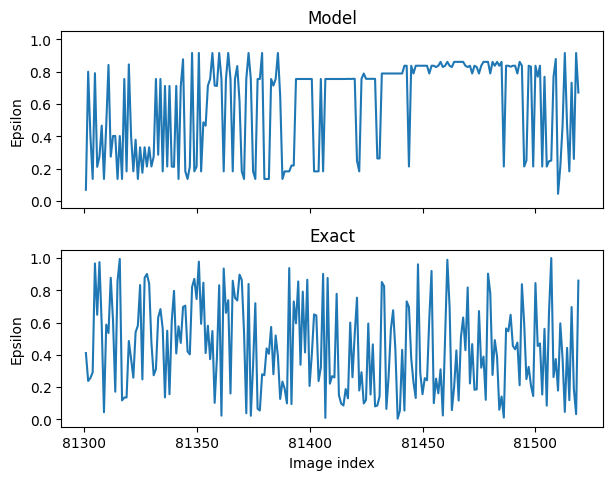

In [128]:
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
fig.tight_layout(pad=2.0)
axs[0].plot(irregular_sample["filenr"], irregular_sample["steel_epsilon"])
axs[0].set_title("Model")
axs[0].set_ylabel("Epsilon")
axs[1].plot(irregular_sample["filenr"], irregular_sample["exact_epsilon"])
axs[1].set_title("Exact")
axs[1].set_ylabel("Epsilon")
plt.xlabel("Image index")

## Średni bezwzględny błąd cykliczny 

(Założenie że Exact to ground truth)

Text(0.5, 1.0, 'CAE averaged over 100 images')

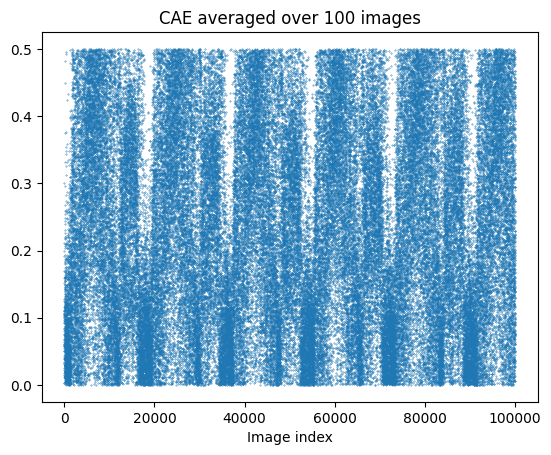

In [137]:
plt.scatter(both["filenr"], both["cmae"], s=0.1)
plt.xlabel("Image index")
plt.title("CAE averaged over 100 images")

In [129]:
indices = []
cmaes = []
for x in range(0, 99000, 100):
    sample = both[(both["filenr"] > x) & (both["filenr"] < x + 100)]
    cmae = sample["cmae"].mean()
    # if cmae>0.35:
    #     print(x)
    cmaes.append(cmae)
    indices.append(x)

Text(0.5, 1.0, 'CAE averaged over 100 images')

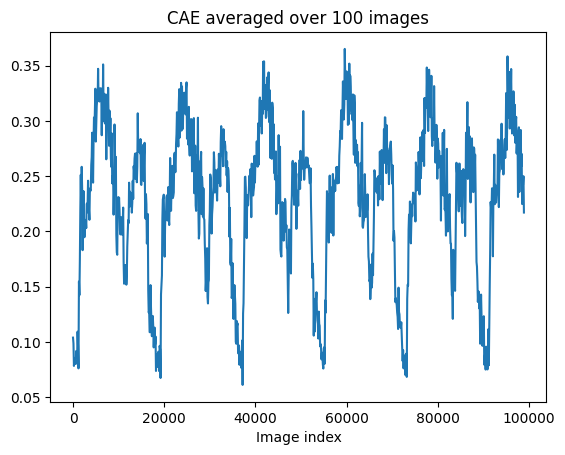

In [130]:
plt.plot(indices, cmaes)
plt.xlabel("Image index")
plt.title("CAE averaged over 100 images")

In [131]:
cmaes

[np.float64(0.10379691474084418),
 np.float64(0.09855069678046503),
 np.float64(0.07816978575675851),
 np.float64(0.08377509145622448),
 np.float64(0.08497517595283044),
 np.float64(0.08130531604336003),
 np.float64(0.07994171376661169),
 np.float64(0.0916465902831209),
 np.float64(0.0899297212251451),
 np.float64(0.08535303039377125),
 np.float64(0.10919312723646851),
 np.float64(0.09641547258592213),
 np.float64(0.07593896476546311),
 np.float64(0.15456511355127325),
 np.float64(0.14224081437527156),
 np.float64(0.17397362770642416),
 np.float64(0.21826880770008764),
 np.float64(0.25118562983042514),
 np.float64(0.22000007275980135),
 np.float64(0.25848309810785763),
 np.float64(0.2390085603398154),
 np.float64(0.18298472386066822),
 np.float64(0.21405112420351363),
 np.float64(0.23650510339073152),
 np.float64(0.20872837231866406),
 np.float64(0.19471588445039442),
 np.float64(0.20088512259023122),
 np.float64(0.20904000078909107),
 np.float64(0.21043959175168384),
 np.float64(0.202

In [133]:
both["filenr"] = both["filename"].apply(lambda x: int(x.split(".")[0]))
badddd_sample = both[(both["filenr"] > 6600) & (both["filenr"] < 6700)]

Text(0.5, 23.52222222222222, 'Image index')

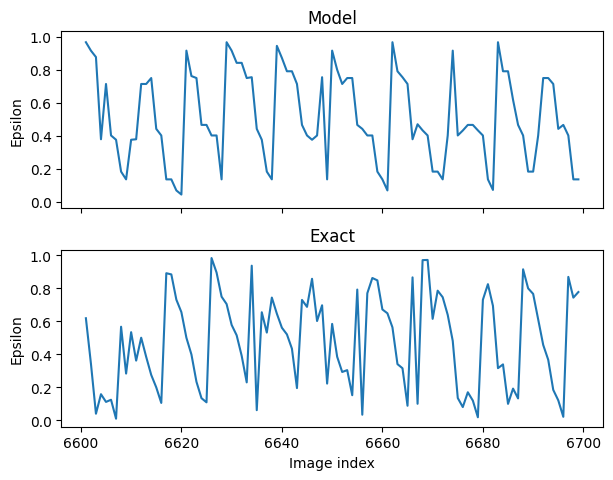

In [134]:
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
fig.tight_layout(pad=2.0)
axs[0].plot(badddd_sample["filenr"], badddd_sample["steel_epsilon"])
axs[0].set_title("Model")
axs[0].set_ylabel("Epsilon")
axs[1].plot(badddd_sample["filenr"], badddd_sample["exact_epsilon"])
axs[1].set_title("Exact")
axs[1].set_ylabel("Epsilon")
plt.xlabel("Image index")